In [1]:
# 보조 축 활용하기(2축 그래프 그리기)

In [3]:
# 증감률을 계산하기 위해 rename() 메소드로 '합계' 열의 이름을 '총발전량'으로 바꾸고, 
# shift() 메소드를 이용하여 '총발전량'열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량 -1년' 열을 새로 생성
# 두 열의 데이터를 이용하여 전년도 대비 변동율을 계산한 결과를 '증감률' 열에 저장

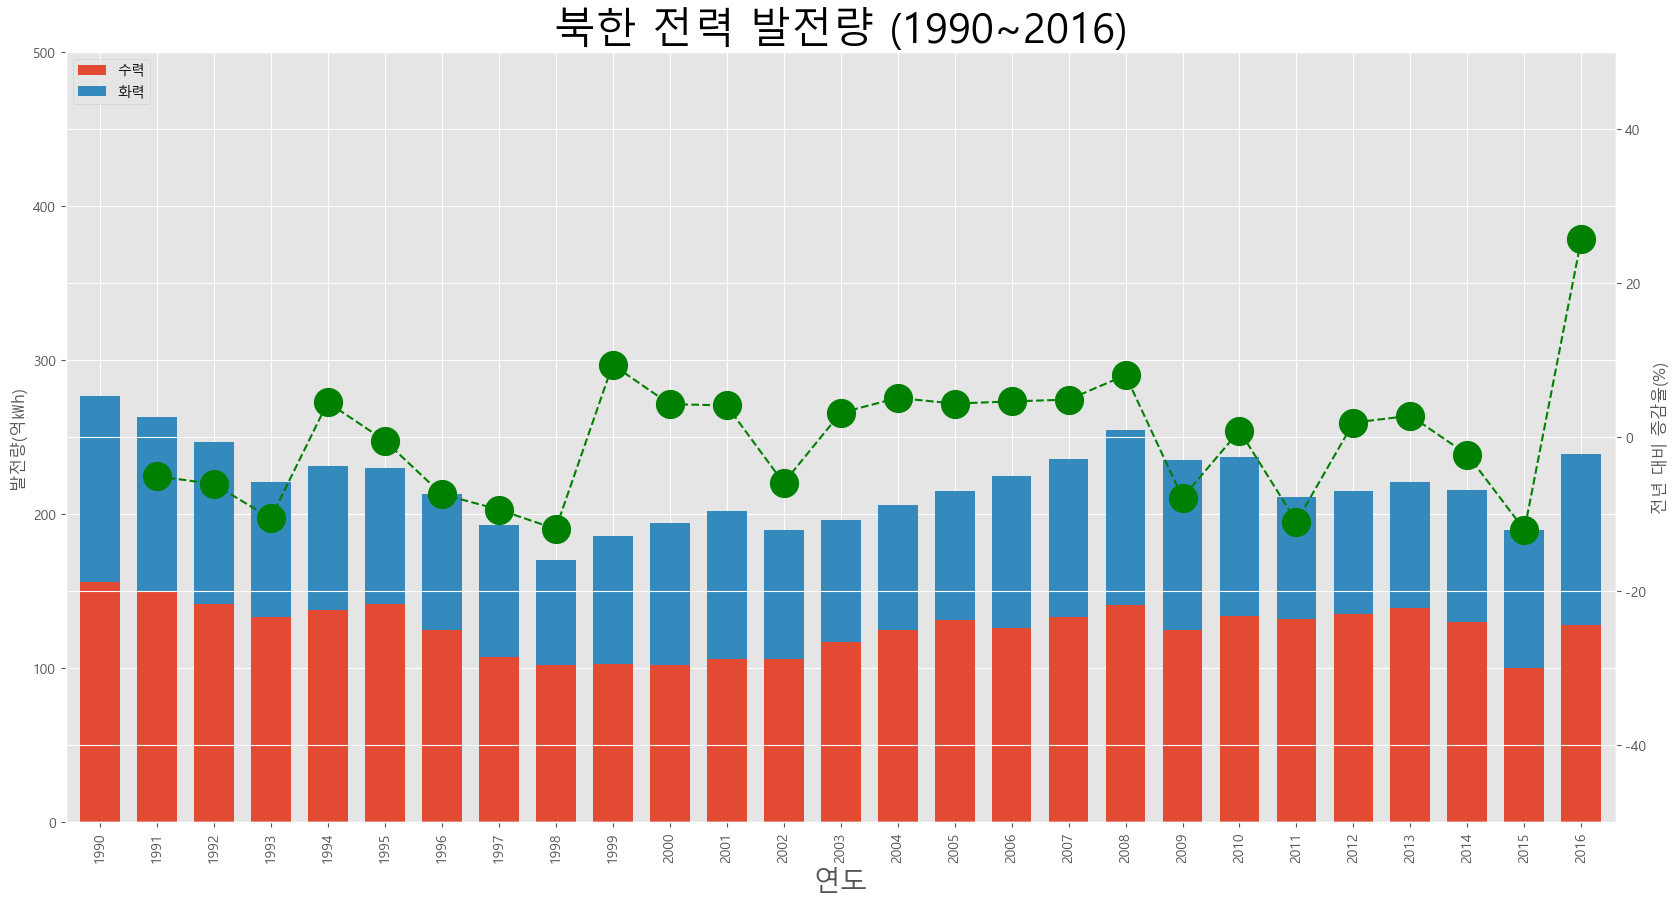

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path = './data/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

plt.style.use('ggplot') # 스타일 서식 지정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 출력 설정 

# Excel 데이터를 데이터프레임 변환
df = pd.read_excel ('./data/남북한발전전력량.xlsx')
df = df.loc[5:9]
df.drop('전력량 (억㎾h)', axis = 'columns', inplace = True)
df.set_index('발전 전력별', inplace = True)
df = df.T

# 원자력 열의 '-' 값을 '0'으로 변경하고, 자료형을 실수형으로 변환
for col in df.columns:
    df[col] = df[col].replace('-', '0')

df = df.astype(float)

# 증감율(변동률) 계산
df = df.rename(columns = {'합계':'총발전량'}) # 합계를 총발전량으로 이름 바꿈
df['총발전량 - 1년'] = df['총발전량'].shift(1) 
# shift 메소드를 이용하여 '총발전량' 열의 데이터를 1행씩 뒤로 이동시켜서 '총발전량 -1년] 
df['증감율'] = ((df['총발전량'] / df['총발전량 - 1년']) - 1) * 100 
# 두 열의 데이터를 이용하여 전년도 대비 변동률을 계산한 결과를 '증감률' 열에 저장

# 2축 그래프 그리기
# ax1 객체는 막대그래프에 stacked = True 옵션을 지정하여 '수력','화력' 열의 값을 위아래로 누적하여 쌓은 형태의 세로형 가로 막대 그래프 그림
ax1 = df[['수력','화력']].plot(kind = 'bar', figsize = (20,10), width = 0.7, stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index, df.증감율, ls = '--', marker = 'o', markersize = 20,
         color = 'green', label = '전년대비 증감율(%)')
ax1.set_ylim(0,500)
ax2.set_ylim(-50,50)

ax1.set_xlabel('연도', size = 20)
ax1.set_ylabel('발전량(억㎾h)')
ax2.set_ylabel('전년 대비 증감율(%)')

plt.title('북한 전력 발전량 (1990~2016)', size = 30)
ax1.legend(loc = 'upper left')

plt.show()
